In [6]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd
import math

In [7]:
df = pd.read_excel('naca0012.xlsx')

In [8]:
x = df['x']
y = df['y']

In [10]:
df = pd.DataFrame({'x': x, 'y': y})

In [11]:
# plt.plot(x,y)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Original Airfoil (NACA 0012)')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.grid()

In [12]:
x = df['x'].values
y = df['y'].values

In [13]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [14]:
t_max = 2*max(abs(y))
t_max

0.12

In [15]:
#inputs
n = 4
w = np.full(n,2) 
xM = [0.2, 0.4, 0.6, 0.8]

In [16]:
def hicks_henne_overall(x_coord, y_coord , n, a, i, w, xM):
    def split_xy(arr):
        half = len(arr)//2
        return arr[:half+1], arr[half+1:]

    x_up, x_low = split_xy(x)
    y_up, y_low = split_xy(y)
    
    a_up = a[i][:n]
    a_low = a[i][n:]

    def hicks_henne(x_coord, y_coord , n, a, w, xM):
        y_deformed = np.array(y_coord)
        for i in range(n):
            ai = a[i]
            xMi = xM[i]
            wi = w[i]
            m = np.log(0.5)/np.log(xMi)
            f = np.sin(np.pi * np.array(x_coord) ** m ) ** wi
            y_deformed += ai * f
            
            x_1 = []
            for j in range(0,1001):
                x_1.append(j/1000)
            f_b = np.sin(np.pi * np.array(x_1) ** m ) ** wi
            
    #         plt.xlabel('X-coordinate')
    #         plt.ylabel('Bump function')
    #         plt.plot(x_1, f_b)
    #         plt.title('Hicks-Henn Bump Function')
    
        return y_deformed 

    
    y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)
    y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)
    y_mod = np.concatenate((y_mod_up, y_mod_low))
    return y_mod



In [19]:
def plot_foils(x, y, y_mod):
    plt.plot(x, y, label = "Original Airfoil")
    plt.plot(x, y_mod, label = "Deformed Airfoil")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Original Airfoil vs Deformed Airfoil')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend(loc=(1,1))
    plt.grid()

In [22]:
i = 0
a_opt_oneshot = [[ 0.012    ,  0.012    , -0.01196069, -0.00045077, -0.01199931, 0.01018265,  0.012     ,  0.0048373 ]]
a_opt_adaptive = [[0.01097098, 0.00985548, 0.01090458, 0.012     , 0.01199999,     0.012     , 0.00801838, 0.01097239]]

y_oneshot = hicks_henne_overall(x, y , n, a_opt_oneshot, i, w, xM)
y_adaptive = hicks_henne_overall(x, y , n, a_opt_adaptive, i, w, xM)

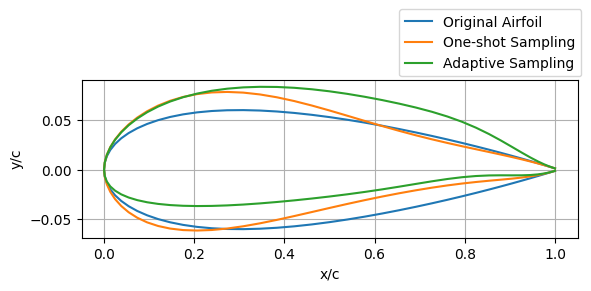

In [41]:
plt.plot(x, y, label = "Original Airfoil")
plt.plot(x, y_oneshot, label = "One-shot Sampling")
plt.plot(x, y_adaptive, label = "Adaptive Sampling")
plt.gca().set_aspect(2.2)
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.legend(loc=(0.64,1.02))
plt.grid()